<h4>
Geoposital:
</h4>
<ul>
<li> Using Geopy to fill null values for columns neighbour, neighbourhood</li>
</ul>


In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/Users/saeedazad/Desktop/Projects/airbnb-data-analysis/Airbnb_Open_Data.csv", low_memory=False)

In [8]:
df1= df.copy()

In [9]:
df1.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
df1.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
columns = df1.columns
columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [12]:
df1.columns = df1.columns.str.replace(' ', '_')

In [13]:
df1['price'] = pd.to_numeric(df1['price'].str.replace('[$,]', '', regex=True), errors='coerce')

In [14]:
df1.shape

(102599, 26)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [16]:
# check duplicates

df1.loc[df1.duplicated()].head() 

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN


In [17]:
df1['neighbourhood_group'].value_counts()


neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [18]:
# Correct misspelled neighbourhood group names
df1['neighbourhood_group'] = df1['neighbourhood_group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})


In [19]:
df1['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64

In [20]:
# drop licence column as it is empty except two values
df1.drop(columns='license', inplace=True)

In [21]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64

In [22]:
 #Drop duplicate rows from the DataFrame, keeping the first occurrence.
df1.drop_duplicates(keep='first', inplace=True)


<table style="color:#BC4A3C; font-size:20px; font-family:'SourceCodePro';">
<br>
  <td><b>Identifying duplicates that combine of property host, coordinate and price then grouping by host_name </b></td>
</table>


In [23]:

listing_duplicated = df1.loc[df1.duplicated(subset=['host_name', 'lat', 'long', 'price'], keep=False)]
listing_duplicated_sorted = listing_duplicated.sort_values(by=['host_name','lat', 'long', 'price'])
#listing_duplicated_sorted.head(20)
listing_grouped = listing_duplicated_sorted.groupby(['host_name', 'lat','long','price'])


# for n, (host_name, value) in enumerate(listing_grouped):
#         if n>=5:
#            break
#         print(f"Host: {host_name}")
#         print(value)
#         print("\n")      
rows = []
for _, group in listing_grouped:
      rows.append(group)
listing_duplicated_data = pd.concat(rows, ignore_index=True)       
listing_duplicated_data.head(10)      
              

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,6698863,MANHATTAN LIVING!,47503557541,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.78938,-73.94679,United States,...,1179.0,$236,7.0,3.0,12/8/2017,0.06,1.0,1.0,403.0,NaN
1,40849229,MANHATTAN LIVING!,29667285224,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.78938,-73.94679,United States,...,1179.0,$236,7.0,3.0,12/8/2017,0.06,1.0,1.0,56.0,NaN
2,20426279,Prewar Gem in Middle of Everything!,54282592368,verified,(Email hidden by Airbnb),Manhattan,Midtown,40.76399,-73.98077,United States,...,298.0,$60,3.0,3.0,11/17/2018,0.31,2.0,2.0,0.0,This is a non-smoking residence. There is lig...
3,55184175,Prewar Gem in Middle of Everything!,15009968728,unconfirmed,(Email hidden by Airbnb),Manhattan,Midtown,40.76399,-73.98077,United States,...,298.0,$60,3.0,3.0,11/17/2018,0.31,2.0,2.0,0.0,This is a non-smoking residence. There is lig...
4,9420045,Upper West Side One Bedroom on Central Park,71186355784,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.79610,-73.96300,United States,...,62.0,$12,1.0,60.0,7/6/2019,2.91,1.0,1.0,182.0,NaN
5,47982736,Upper West Side One Bedroom on Central Park,44094754427,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.79610,-73.96300,United States,...,62.0,$12,1.0,60.0,7/6/2019,2.91,1.0,1.0,182.0,NaN
6,11796040,Newly Renovate 2 Bedroom Apartment in Central ...,93276365126,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
7,43367717,Newly Renovate 2 Bedroom Apartment in Central ...,97706575002,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
8,50358730,Newly Renovate 2 Bedroom Apartment in Central ...,8771779200,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
9,56028090,Newly Renovate 2 Bedroom Apartment in Central ...,11521662908,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN


In [24]:
listing_duplicated = df1.loc[df1.duplicated(subset=['host_name', 'lat', 'long', 'price'], keep=False)]
listing_duplicated_sorted = listing_duplicated.sort_values(by=['host_name','lat', 'long', 'price'])

# Create a dictionary to store the groups
group_dict = {}
for name, group in listing_duplicated_sorted.groupby(['host_name', 'lat', 'long', 'price']):
    group_dict[name] = group

# Create a list to store DataFrames with style information
rows = []
for i, (name, group) in enumerate(group_dict.items()):
    # Alternate between green and light green
    color = 'background-color: #grey' if i % 2 == 0 else 'background-color: #orange'  
    # Add a new column with the style information
    group = group.copy()
    group['style'] = color
    rows.append(group)

# Concatenate all groups
listing_duplicated_data = pd.concat(rows, ignore_index=True)

# Apply styling when displaying the DataFrame
def highlight_rows(row):
    return [row['style']] * len(row)

# Display the styled DataFrame
listing_duplicated_data.head(10).style.apply(highlight_rows, axis=1)

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,style
0,6698863,MANHATTAN LIVING!,47503557541,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.789380,-73.946790,United States,US,True,moderate,Entire home/apt,2020.000000,1179.000000,$236,7.000000,3.000000,12/8/2017,0.060000,1.000000,1.000000,403.000000,nan,background-color: #grey
1,40849229,MANHATTAN LIVING!,29667285224,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.789380,-73.946790,United States,US,True,moderate,Entire home/apt,2020.000000,1179.000000,$236,7.000000,3.000000,12/8/2017,0.060000,1.000000,1.000000,56.000000,nan,background-color: #grey
2,20426279,Prewar Gem in Middle of Everything!,54282592368,verified,(Email hidden by Airbnb),Manhattan,Midtown,40.763990,-73.980770,United States,US,True,flexible,Private room,2014.000000,298.000000,$60,3.000000,3.000000,11/17/2018,0.310000,2.000000,2.000000,0.000000,"This is a non-smoking residence. There is light housekeeping (washing of linens (biweekly), towels, removal of kitchen trash) but guests are expected to clean up after themselves and keep the area tidy, including removing hair from the bathtub and sink and washing dishes right away. Remove shoes in the apartment. Slippers are OK. Turn off lights when exiting a room or hallway. Guests are not permitted without prior authorization. Overnight guests are not allowed. Be courteous to others in the household. Additional rules will be in the house manual, available upon arrival.",background-color: #orange
3,55184175,Prewar Gem in Middle of Everything!,15009968728,unconfirmed,(Email hidden by Airbnb),Manhattan,Midtown,40.763990,-73.980770,United States,US,False,moderate,Private room,2014.000000,298.000000,$60,3.000000,3.000000,11/17/2018,0.310000,2.000000,2.000000,0.000000,"This is a non-smoking residence. There is light housekeeping (washing of linens (biweekly), towels, removal of kitchen trash) but guests are expected to clean up after themselves and keep the area tidy, including removing hair from the bathtub and sink and washing dishes right away. Remove shoes in the apartment. Slippers are OK. Turn off lights when exiting a room or hallway. Guests are not permitted without prior authorization. Overnight guests are not allowed. Be courteous to others in the household. Additional rules will be in the house manual, available upon arrival.",background-color: #orange
4,9420045,Upper West Side One Bedroom on Central Park,71186355784,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.796100,-73.963000,United States,US,False,strict,Private room,2018.000000,62.000000,$12,1.000000,60.000000,7/6/2019,2.910000,1.000000,1.000000,182.000000,nan,background-color: #grey
5,47982736,Upper West Side One Bedroom on Central Park,44094754427,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.796100,-73.963000,United States,US,True,moderate,Private room,2018.000000,62.000000,$12,1.000000,60.000000,7/6/2019,2.910000,1.000000,1.000000,182.000000,nan,background-color: #grey
6,11796040,Newly Renovate 2 Bedroom Apartment in Central Area,93276365126,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.634610,-74.024510,United States,US,True,moderate,Entire home/apt,2018.000000,465.000000,$93,1.000000,188.000000,6/24/2019,5.810000,2.000000,1.000000,295.000000,nan,background-color: #orange
7,43367717,Newly Renovate 2 Bedroom Apartment in Central Area,97706575002,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.634610,-74.024510,United States,US,True,flexible,Entire home/apt,2018.000000,465.000000,$93,1.000000,188.000000,6/24/2019,5.810000,2.000000,1.000000,295.000000,nan,background-color: #orange
8,50358730,Newly Renovate 2 Bedroom Apartment in Central Area,8771779200,unconfirmed,(Mary) Haiy,Bro

In [25]:
duplicated = df1.loc[(df1['id']==11796040) |(df1['id']==50358730)]
duplicated

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
19545,11796040,Newly Renovate 2 Bedroom Apartment in Central ...,93276365126,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
89367,50358730,Newly Renovate 2 Bedroom Apartment in Central ...,8771779200,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN


<table style="background-color:#FA8072; color:black;">
<td> Eliminate duplicatd rows.</td>
</table>

In [26]:
#drop duplicates
df1.drop_duplicates(subset=['host_name', 'lat', 'long', 'price'], inplace=True)

In [27]:
#df1.dropna(subset='price' , inplace=True)

In [28]:
df1['neighbourhood_group'].isna().sum()

np.int64(29)

 <table style="color:black; background-color:#AFE1AF; font-size:20px; font-family:'SourceCodePro';">
  <tr>
    <th>Task</th>
    <th >Description</th>
  </tr>
  <tr>
    <td >Impute</td>
    <td>Utilize geopy to impute the neighborhood and neighborhood group based on provided latitude and longitude coordinates.</td>
  </tr>
</table>


In [29]:
#!pip install geopy
#try it out 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

# Check sample location
location = geolocator.geocode("New Farm")
location

Location(New Farm, Greater Brisbane, Queensland, 4005, Australia, (-27.466589, 153.04693631358884, 0.0))

In [30]:
# 
def loc_from_cord(lat, lng):
    try:
        location = geolocator.reverse(f"{lat}, {lng}", timeout=30)
        return location.raw['address'].get('road', '')
    except Exception as e:
        print(f"the error is {e}")
        return 'unknown'

In [31]:
# idx = df1[df1['neighbourhood'].isna()].index
# df1.loc[idx, 'neighbourhood'] = df1.loc[idx].apply(lambda x:loc_from_cord(x.lat, x.long), axis=1)
df1.loc[df1['neighbourhood'].isna(), 'neighbourhood'] = df1.loc[df1['neighbourhood'].isna()].apply(lambda x:loc_from_cord(x.lat, x.long),axis=1)

In [32]:
df1['neighbourhood_group'].isna().sum()

np.int64(29)

In [33]:
def borough_from_coord(lat, long):
    location = geolocator.reverse(f"{lat}, {long}", timeout=20)
    return location.raw['address'].get('borough', ',')



In [34]:
idx = df1[df1['neighbourhood_group'].isnull()].index

In [35]:
## impute  the neighbourdhood_group with finding borough based on lat, long
df1.loc[idx, 'neighbourhood_group'] = df.loc[idx].apply(lambda x:borough_from_coord(x.lat, x.long), axis=1)

In [36]:
# 
lat_null_index = df[df.long.isnull()].index
lat_null_index

Index([779, 785, 799, 814, 843, 885, 926, 986], dtype='int64')

In [41]:
"""
    This function is used for imputing latitude and longitude.Get the geographical coordinates (latitude and longitude) for a given location.
"""
def get_coordinates(loc):
    location = geolocator.geocode(loc, timeout=30)
    if location:
        return location.latitude, location.longitude
    return None, None


In [42]:
get_coordinates(f"New Farm,Greater Brisbane")

(-27.466589, 153.04693631358884)

In [43]:
"""
    This function is used for imputing latitude and longitude.Get the geographical coordinates (latitude and longitude) for a given location.
"""
for idx in lat_null_index:
    location_str = f"{df1.loc[idx,'neighbourhood']}, {df1.loc[idx,'neighbourhood_group']}"
    lat, long = get_coordinates(location_str)
    df1.loc[idx,'lat'] =lat
    df1.loc[idx,'long']=long

#df1.loc[idx, 'long'] = df1.loc[idx].apply(lambda x:long_from_loc(f"{x['neighbourhood']}, {x['neighbourhood_group']}"),axis=1)

In [53]:
df1.isna().sum().sort_values(ascending=False)

house_rules                       36645
reviews_per_month                 10814
availability_365                    438
minimum_nights                      363
country                             323
host_name                           313
price                               245
service_fee                         241
review_rate_number                  239
host_identity_verified              217
NAME                                208
Construction_year                   190
number_of_reviews                   152
calculated_host_listings_count      144
country_code                         86
instant_bookable                     86
cancellation_policy                  57
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
room_type                             0
last_review                           0


In [47]:
df1.shape

(69305, 25)

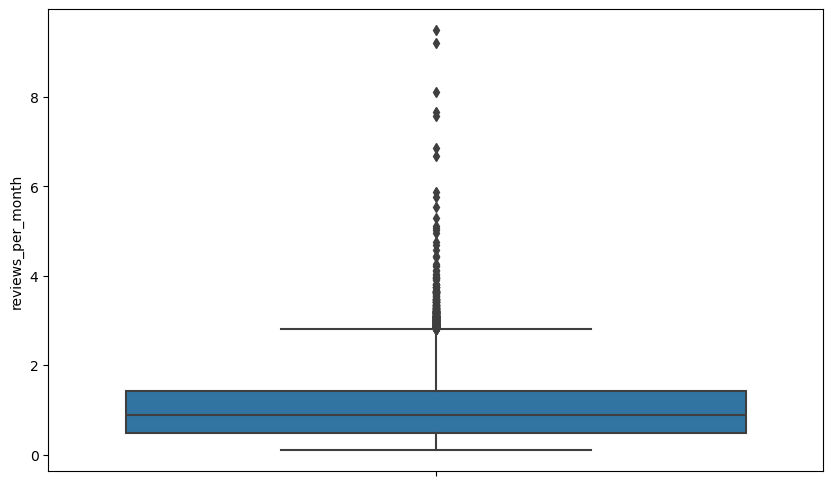

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the boxplot with the transformed data
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df1, y=np.sqrt(df1['reviews_per_month']), ax=ax1)

# Show the plot
plt.show()


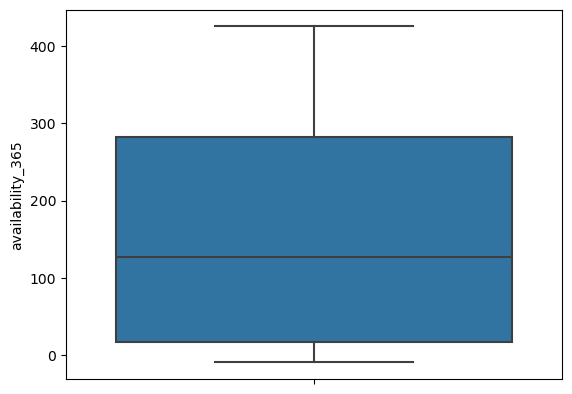

In [49]:
sns.boxplot(data=df1, y='availability_365')
plt.show()  

In [50]:
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [51]:
df1['last_review'].head()

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [111]:
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1['last_review'].min(), df1['last_review'].median(), df1['last_review'].max()

(Timestamp('2012-07-11 00:00:00'),
 Timestamp('2019-06-23 00:00:00'),
 Timestamp('2058-06-16 00:00:00'))

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69305 entries, 0 to 102050
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69305 non-null  int64         
 1   NAME                            69097 non-null  object        
 2   host_id                         69305 non-null  int64         
 3   host_identity_verified          69088 non-null  object        
 4   host_name                       68992 non-null  object        
 5   neighbourhood_group             69305 non-null  object        
 6   neighbourhood                   69305 non-null  object        
 7   lat                             69305 non-null  float64       
 8   long                            69305 non-null  float64       
 9   country                         68982 non-null  object        
 10  country_code                    69219 non-null  object        
 11  instan

/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


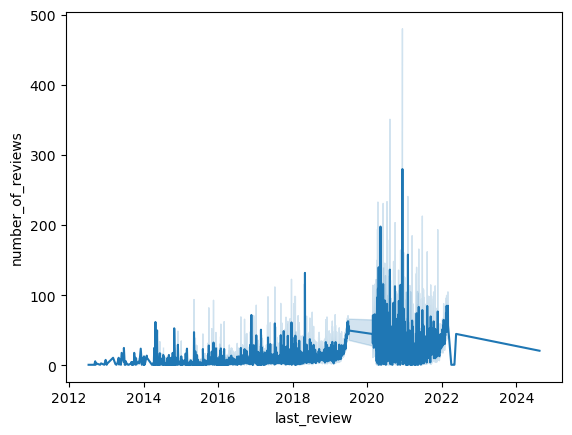

In [143]:
sns.lineplot(data=df1, x='last_review', y='number_of_reviews')
plt.show()

/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


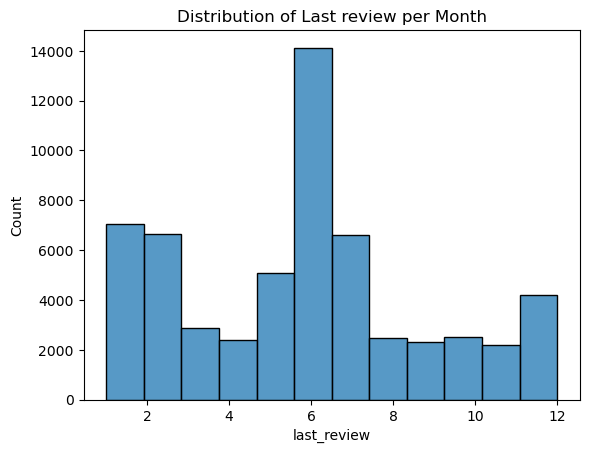

In [147]:
sns.histplot(df1['last_review'].dt.month, bins=12, kde=False)
plt.title("Distribution of Last review per Month")
plt.show()

In [52]:
#Replace null value with median last_review 
df1.loc[df1['last_review'].isnull(), 'last_review']= df1['last_review'].median()

In [54]:
# do the same thing for reviews_per_month

df1.loc[df1['reviews_per_month'].isnull(), 'reviews_per_month']=df1['reviews_per_month'].median()

In [198]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

def loc_from_coord(lat, long):
    try:
        location = geolocator.reverse(f"{lat},{long}", timeout=10)
        print(location.raw)  # Debug information
        if location and 'address' in location.raw:
            address = location.raw['address']
            # Attempt to retrieve a more granular location if 'suburb' is not available
            return address.get('borough', address.get('city', address.get('town', address.get('village', 'Unknown'))))
        else:
            return 'Unknown'
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error: {e}")
        return 'Error'


In [ ]:
print(loc_from_coord(40.72828, -73.98801))

In [62]:
print(loc_from_coord(40.68346, -73.96374))

Brooklyn


In [55]:
''' delete column country code'''
df1.drop('country_code', axis=1, inplace=True)

In [153]:
df1['host_identity_verified'].isnull().sum()

np.int64(217)

In [56]:
# assign unconfirmed value to nan values in host_identity_verified
df1.loc[df1['host_identity_verified'].isnull(), 'host_identity_verified']='unconfirmed'


In [57]:
df1.loc[df1['availability_365'].isnull(), 'availability_365']=df1['availability_365'].median()

In [58]:
df1.loc[df1['price'].isnull(), 'price']= df1['price'].median()

In [59]:
# To convert $ or anyhing that is not digit or nan to '' in service fee
df1.loc[~df1['service_fee'].isna(),'service_fee']= df1.loc[~df1['service_fee'].isna()].apply(lambda x:re.sub(r'\D','',x['service_fee']),axis=1)

In [60]:
df1['service_fee'] = pd.to_numeric(df1['service_fee'])
df1.loc[df1['service_fee'].isna(),'service_fee'] = round(df1['service_fee'].median())

<table style=" color:black; background-color:#48c9b0 ; font=family:'monospace';">
<td> Handling outliers in minimum_nights column using the IQR method</td>
</table>

In [62]:
df1.minimum_nights.min() , df1.minimum_nights.max()

(-1223.0, 5645.0)

/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


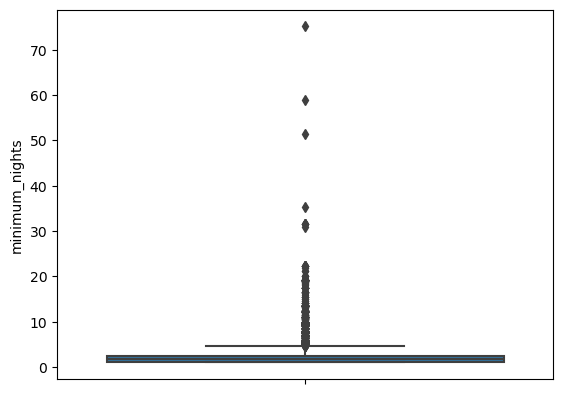

In [63]:
sns.boxplot(data=df1, y=np.sqrt(df1['minimum_nights']))

plt.show()

In [64]:
Q1 = df1['minimum_nights'].quantile(0.25)
Q3 = df1['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_bound

np.float64(13.5)

In [66]:

df1['minimum_nights'] = df1['minimum_nights'].clip(lower=0, upper=round(upper_bound))

In [67]:
df1['minimum_nights'].median()

3.0

<ul style=" color:black; background-color:#85c1e9 ; font=family:'monospace';">
<li> Filling null values for below columns with median </li>
</ul>

In [68]:
df1['minimum_nights'] = df1['minimum_nights'].fillna(df1['minimum_nights'].median())

In [69]:
df1['review_rate_number']=df1['review_rate_number'].fillna(df1['review_rate_number'].median())

In [70]:
df1['Construction_year'] = df1['Construction_year'].infer_objects().fillna(df1['Construction_year'].median())


In [71]:
df1['number_of_reviews'] = df1['number_of_reviews'].infer_objects().fillna(df1['number_of_reviews'].median())

In [72]:
df1['calculated_host_listings_count'] = df1['calculated_host_listings_count'].fillna(df1['calculated_host_listings_count'].median())

In [73]:
df1.cancellation_policy = df1.cancellation_policy.fillna('moderate')

In [74]:
df1.instant_bookable= df1.instant_bookable.infer_objects().fillna(True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_3076/4161425808.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.instant_bookable= df1.instant_bookable.infer_objects().fillna(True)


In [84]:
df1.isna().sum().sort_values(ascending=False)

house_rules                       36645
host_name                           313
NAME                                208
host_id                               0
host_identity_verified                0
neighbourhood_group                   0
id                                    0
neighbourhood                         0
lat                                   0
instant_bookable                      0
long                                  0
room_type                             0
Construction_year                     0
price                                 0
cancellation_policy                   0
service_fee                           0
minimum_nights                        0
last_review                           0
number_of_reviews                     0
reviews_per_month                     0
review_rate_number                    0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<ul style="background-color:salmon; color:black">
<li> Manage the rest columns with null values.</li>
</ul>

In [83]:
df1.drop('country', axis=1, inplace=True)

In [94]:
df1.columns = df1.columns.str.lower()

In [96]:
df1.loc[df1['name'].isna(), 'name'] ='Not mentioned'

In [99]:
df1.loc[df1['house_rules'].isna(), 'house_rules'] = 'No rules Mentioned'

In [120]:
# drop null values from host_name
df1= df1.dropna(subset=['host_name'])

In [121]:
df1.shape

(68992, 23)

<h4> Additional column</h4>
<ul> <li>Add a new column to provide the property's distance from LGA airport. </li><ul>

In [122]:
## find each house distance from LaGuardia Airport (LGA)that handles most of domestic flies in New york city.
from geopy.distance import geodesic
airport_point = (40.776863, -73.874069)
def calculate_distance(row):
    point = (row['lat'], row['long'])
    return geodesic(airport_point, point).kilometers

In [133]:
df1.drop('airport_distance', axis=1, inplace=True)

In [140]:
df1['airport_distance'] = df1.apply(lambda x:calculate_distance(x),axis=1)

In [143]:
df1.isna().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
airport_distance                  0
dtype: int64

In [147]:
df1.to_csv('clean_airbnb_data_2.csv',mode='w', index=False)

#####  Integrating Data into Django

As I want to integrate the data into Django, follow these steps:

1. **Create Django Models**: Define the models in Django to match the structure of your DataFrame.
2. **Insert Data into PostgreSQL**: Use the `df.to_sql()` function to efficiently transfer data

                 

In [145]:

from sqlalchemy import create_engine

# Replace the placeholders with your database credentials
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
USER = 'saeedazad'
PASSWORD = '2431'
HOST = 'localhost'
PORT = 5432
DATABASE = 'HomeStay'

# Create the engine
engine = create_engine(f'{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')


In [4]:
clean_df = pd.read_csv("/Users/saeedazad/airbnb-data-analysis/notebook/clean_airbnb_data_2.csv")
df = clean_df.copy()
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,airport_distance
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,16.595114
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,28.0,14.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,9.615297
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,124.0,3.0,0.0,2019-06-23,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",6.747263
3,1002755,Not mentioned,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,74.0,14.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,No rules Mentioned,12.495998
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",6.372458


/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price Distribution')

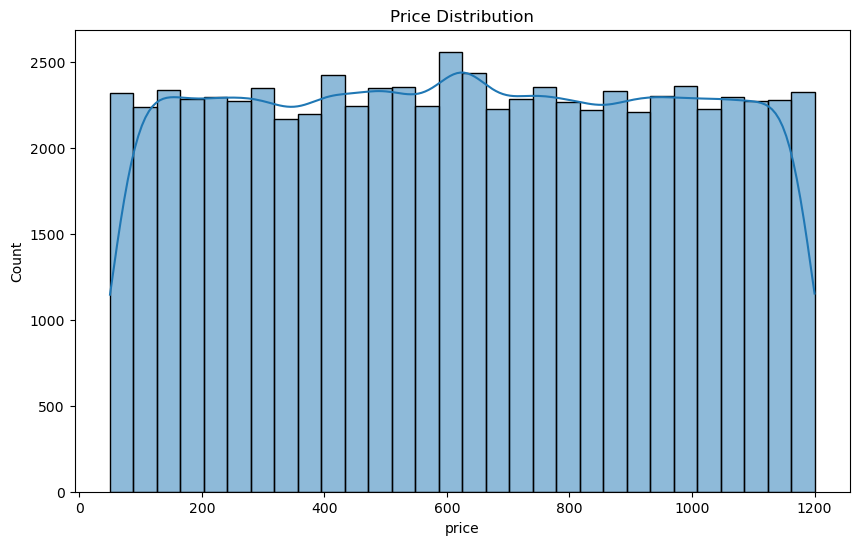

In [ ]:
#figure out price trends
# the below histogram shows the price is right-skewed
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")

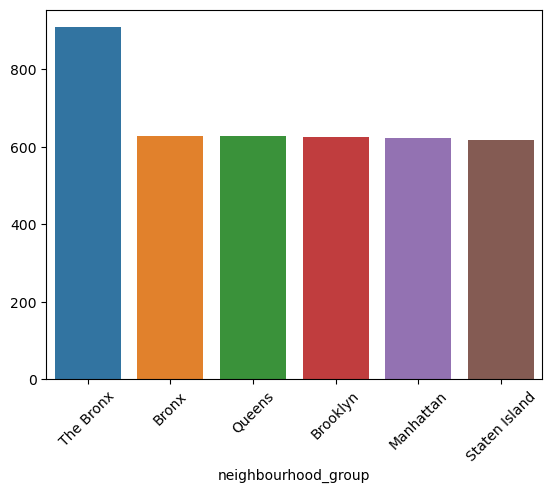

In [8]:
# analyze the price by location
price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=price_by_neighbourhood.index, y=price_by_neighbourhood.values)
plt.xticks(rotation=45)
plt.show()

In [18]:
import folium
from folium.plugins import HeatMap

map_center = [df['lat'].mean(), df['long'].mean()]
m = folium.Map(location=map_center, zoom_start=12)
HeatMap(data=df[['lat', 'long', 'price']].values, radius=15, max_zoom=13).add_to(m)
m.save('price_heatmap.html')

<ul>
<li>Analyze price by room type</li>
</ul>

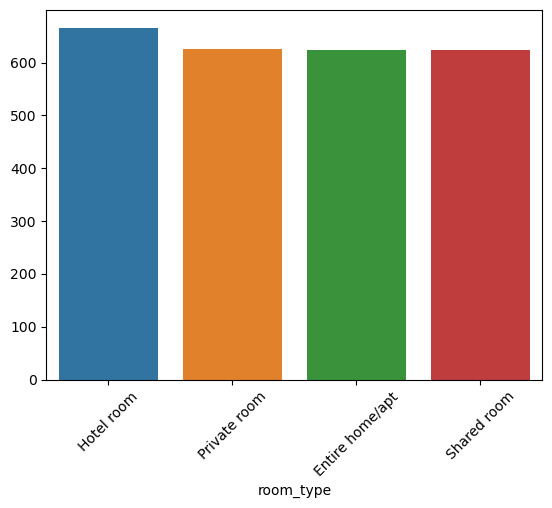

In [16]:
price_by_room_type = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=price_by_room_type.index, y=price_by_room_type.values)
plt.xticks(rotation=45)
plt.show()

In [37]:
mask = df['last_review'].dt.year>2025
df.loc[mask ,'last_review'] = df.loc[mask, 'last_review'].apply(lambda x:x.replace(year=2024))


/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


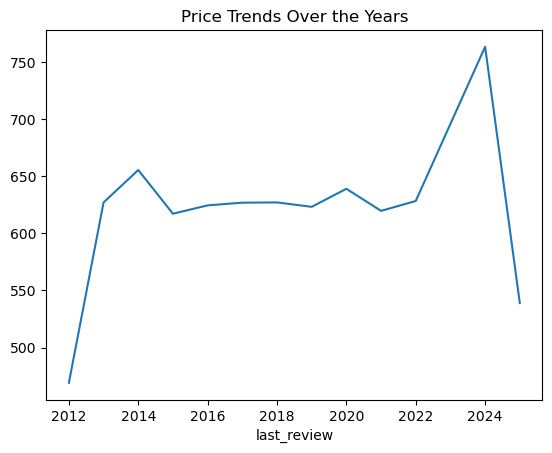

In [53]:
## last 
df['last_review'] = pd.to_datetime(df['last_review'])
price_by_year = df.groupby(df['last_review'].dt.year)['price'].mean()
#price_by_year.plot()
sns.lineplot(x=price_by_year.index, y=price_by_year.values)
plt.title("Price Trends Over the Years")
plt.show()

In [57]:
''' last review does not span wide enough to show the trend'''
df['last_review'].dt.year.value_counts().sort_values(ascending=False)

last_review
2019    36266
2022    10357
2021     6526
2018     6162
2017     3263
2016     2705
2020     2058
2015     1390
2014      199
2013       48
2012       13
2024        4
2025        1
Name: count, dtype: int64

In [7]:
df = pd.read_csv('/Users/saeedazad/airbnb-data-analysis/notebook/clean_airbnb_data_2.csv')
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,airport_distance
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,16.595114
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,28.0,14.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,9.615297
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,124.0,3.0,0.0,2019-06-23,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",6.747263
3,1002755,Not mentioned,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,74.0,14.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,No rules Mentioned,12.495998
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",6.372458


In [22]:
room_type_encoded = pd.get_dummies(df['room_type'], dtype=int, prefix='room_type')
df = pd.concat([df, room_type_encoded],axis=1)
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,review_rate_number,calculated_host_listings_count,availability_365,house_rules,airport_distance,price_cluster,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,16.595114,0,0,0,1,0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,9.615297,4,1,0,0,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",6.747263,3,0,0,1,0
3,1002755,Not mentioned,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,4.0,1.0,322.0,No rules Mentioned,12.495998,1,1,0,0,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",6.372458,4,1,0,0,0


In [123]:
correlation_cols = ['price'] + [col for col in df.columns if col.startswith('room_type_')]
correlation_matrix = df[correlation_cols].corr()
correlation_matrix

,price,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
price,1.000000,-0.001048,0.005142,0.000765,-0.000464
room_type_Entire home/apt,-0.001048,1.000000,-0.044046,-0.954772,-0.158827
room_type_Hotel room,0.005142,-0.044046,1.000000,-0.036193,-0.006021
room_type_Private room,0.000765,-0.954772,-0.036193,1.000000,-0.130508
room_type_Shared room,-0.000464,-0.158827,-0.006021,-0.130508,1.000000


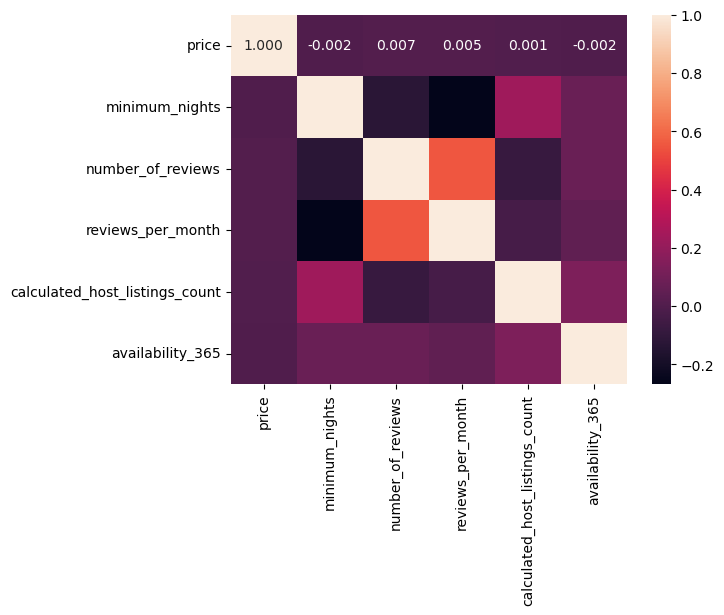

In [136]:
#create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f')
plt.show()

In [77]:
df.drop('room_type_Entire home/apt', axis=1, inplace=True)

In [138]:
print(df.groupby('neighbourhood_group')['price'].describe())

                       count        mean         std    min     25%    50%  \
neighbourhood_group                                                          
Bronx                 1907.0  628.948086  327.084475   50.0  355.50  632.0   
Brooklyn             27758.0  626.317062  331.170043   50.0  341.25  624.0   
Manhattan            29454.0  622.155361  331.017341   50.0  337.00  624.0   
Queens                9227.0  627.596510  332.839179   50.0  338.00  624.0   
Staten Island          645.0  618.537984  326.479956   50.0  343.00  624.0   
The Bronx                1.0  909.000000         NaN  909.0  909.00  909.0   

                       75%     max  
neighbourhood_group                 
Bronx                913.0  1200.0  
Brooklyn             913.0  1200.0  
Manhattan            908.0  1200.0  
Queens               916.0  1200.0  
Staten Island        895.0  1200.0  
The Bronx            909.0   909.0  


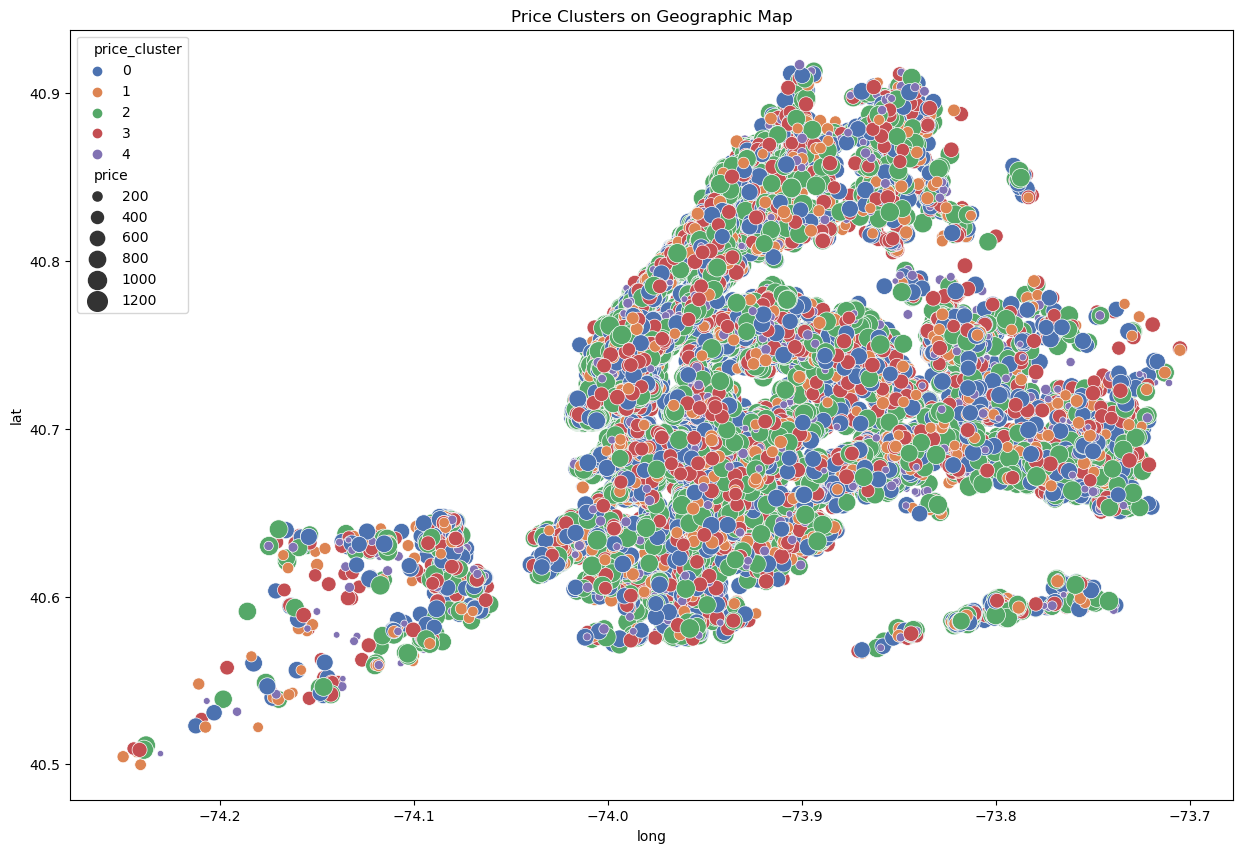

In [12]:
from sklearn.cluster import KMeans

X = df[['price', 'lat', 'long']].dropna()
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
df['price_cluster'] = clusters

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='long', y='lat', hue='price_cluster', palette='deep', size='price', sizes=(20, 200))
plt.title('Price Clusters on Geographic Map')
plt.show()

In [10]:
cluster_prices = df.groupby('price_cluster')['price'].agg(['mean','median','min','max','count']).sort_values(by='mean', ascending=False)
cluster_prices

,mean,median,min,max,count
price_cluster,,,,,
2,1083.975256,1084.0,968.0,1200.0,13862
0,851.628824,851.0,736.0,967.0,13794
3,620.466053,623.0,506.0,735.0,14125
1,392.423660,394.0,278.0,505.0,13584
4,163.805460,163.0,50.0,277.0,13627


In [13]:
cluster_locations = df.groupby('price_cluster')[['lat', 'long']].mean()
cluster_locations

,lat,long
price_cluster,,
0,40.728092,-73.948830
1,40.728464,-73.949063
2,40.727534,-73.948731
3,40.728315,-73.949120
4,40.728022,-73.949416


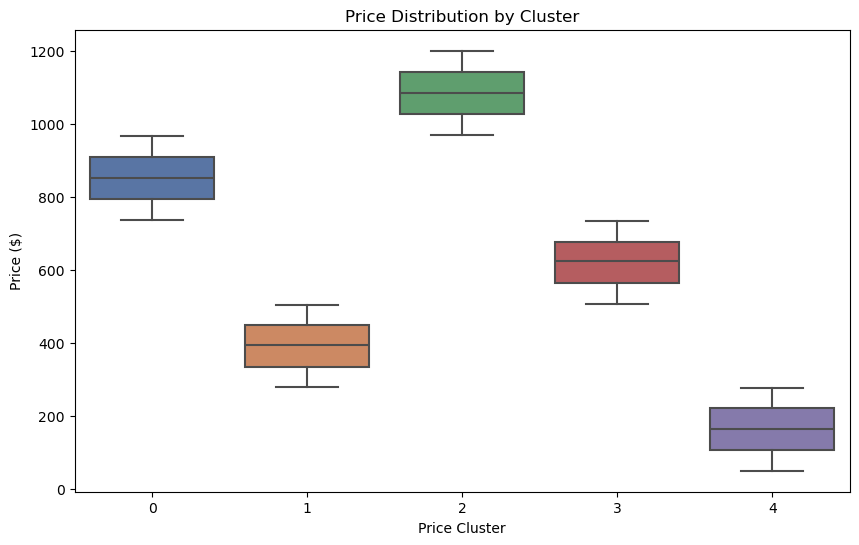

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_cluster', y='price', palette='deep')
plt.title('Price Distribution by Cluster')
plt.xlabel('Price Cluster')
plt.ylabel('Price ($)')
plt.show()

In [21]:
cluster_room_type = pd.crosstab(df['price_cluster'], df['room_type'])
cluster_room_type

room_type,Entire home/apt,Hotel room,Private room,Shared room
price_cluster,,,,
0,7480,22,5994,298
1,7311,30,5956,287
2,7391,26,6151,294
3,7562,25,6241,297
4,7336,12,5989,290


In [90]:
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')
room_type_encoded

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,False,False,True,False
1,True,False,False,False
2,False,False,True,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
68987,False,False,True,False
68988,True,False,False,False
68989,False,False,True,False
68990,True,False,False,False


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat='lat', lon='long', color='price', size='price',
                        hover_data=['neighbourhood', 'room_type'],
                        mapbox_style="carto-positron", zoom=10)
fig.show()


In [97]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
room_type_encoded = encoder.fit_transform(df[['room_type']])
room_type_encoded

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], shape=(68992, 4))

In [98]:
# Convert the encoded array to a DataFrame with column names
room_type_encoded_df = pd.DataFrame(room_type_encoded, 
                                   columns=encoder.get_feature_names_out(['room_type']))

In [107]:
# Reset indices to ensure alignment (optional, but recommended)
df = df.reset_index(drop=True)
room_type_encoded_df = room_type_encoded_df.reset_index(drop=True)

# Concatenate horizontally (along columns)
df = pd.concat([df, room_type_encoded_df], axis=1)

In [109]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'airport_distance', 'id', 'name',
       'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'house_rules',
       'airport_distance', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared

In [108]:
# Define the columns for correlation (numeric + one-hot encoded)
numeric_cols = ['price', 'number_of_reviews', 'minimum_nights']
encoded_cols = list(encoder.get_feature_names_out(['room_type']))
correlation_cols = numeric_cols + encoded_cols

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# View the correlation matrix
print(correlation_matrix)

                              price     price  number_of_reviews  \
price                      1.000000  1.000000           0.006925   
price                      1.000000  1.000000           0.006925   
number_of_reviews          0.006925  0.006925           1.000000   
number_of_reviews          0.006925  0.006925           1.000000   
minimum_nights            -0.001937 -0.001937          -0.125219   
minimum_nights            -0.001937 -0.001937          -0.125219   
room_type_Entire home/apt -0.001048 -0.001048           0.000507   
room_type_Entire home/apt -0.001048 -0.001048           0.000507   
room_type_Entire home/apt -0.001048 -0.001048           0.000507   
room_type_Hotel room       0.005142  0.005142           0.043996   
room_type_Hotel room       0.005142  0.005142           0.043996   
room_type_Hotel room       0.005142  0.005142           0.043996   
room_type_Private room     0.000765  0.000765           0.002940   
room_type_Private room     0.000765  0.000765   

In [105]:
# After creating room_type_encoded
print(type(room_type_encoded))# Check the first row’s values

<class 'numpy.ndarray'>


In [106]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,house_rules,airport_distance,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,Clean up and treat the home the way you'd like...,16.595114,False,False,True,False,0.0,0.0,1.0,0.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,Pet friendly but please confirm with me if the...,9.615297,True,False,False,False,1.0,0.0,0.0,0.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,"I encourage you to use my kitchen, cooking and...",6.747263,False,False,True,False,0.0,0.0,1.0,0.0
3,1002755,Not mentioned,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,No rules Mentioned,12.495998,True,False,False,False,1.0,0.0,0.0,0.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,"Please no smoking in the house, porch or on th...",6.372458,True,False,False,False,1.0,0.0,0.0,0.0


In [81]:
## one-hot encoding
room_type_encoded= pd.get_dummies(df['room_type'], prefix='room_type')
df = pd.concat([df, room_type_encoded], axis=1)
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,airport_distance,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,16.595114,False,False,True,False
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,9.615297,True,False,False,False
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",6.747263,False,False,True,False
3,1002755,Not mentioned,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,4.64,4.0,1.0,322.0,No rules Mentioned,12.495998,True,False,False,False
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",6.372458,True,False,False,False


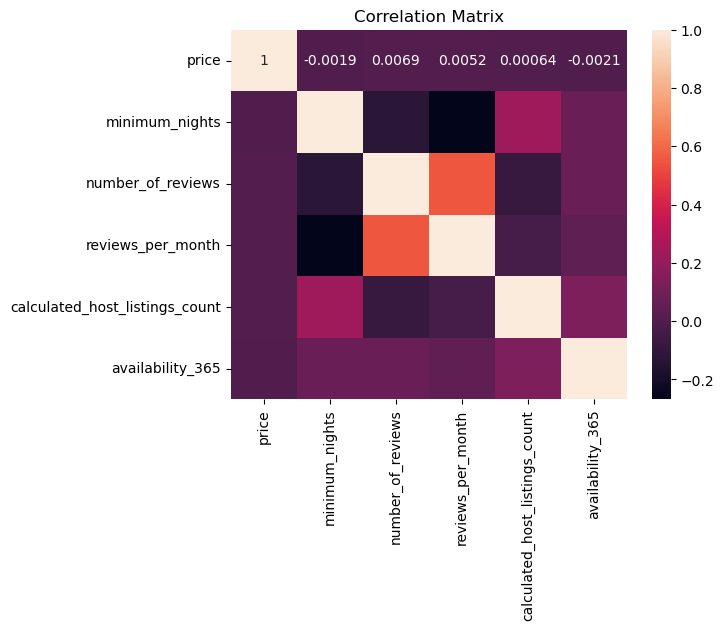

In [132]:
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [233]:
# Assuming df is your DataFrame
df1.to_sql('airbnb_data', engine, index=False, if_exists='replace')  # Use 'append' if you want to add to an existing table


305

In [12]:
values = df1['reviews_per_month'].values
values

array([0.21, 0.38,  nan, ...,  nan, 0.1 ,  nan], shape=(102599,))

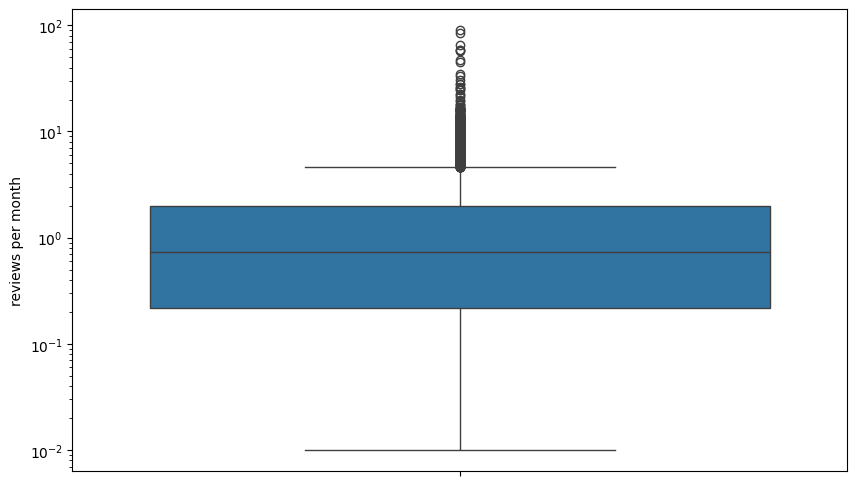

In [17]:
# Create a boxplot
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample right-skewed data
values = df1['reviews_per_month'].values

# Create the figure and boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
sns.boxplot(y='reviews per month', data=df)
plt.yscale('log')
plt.show()




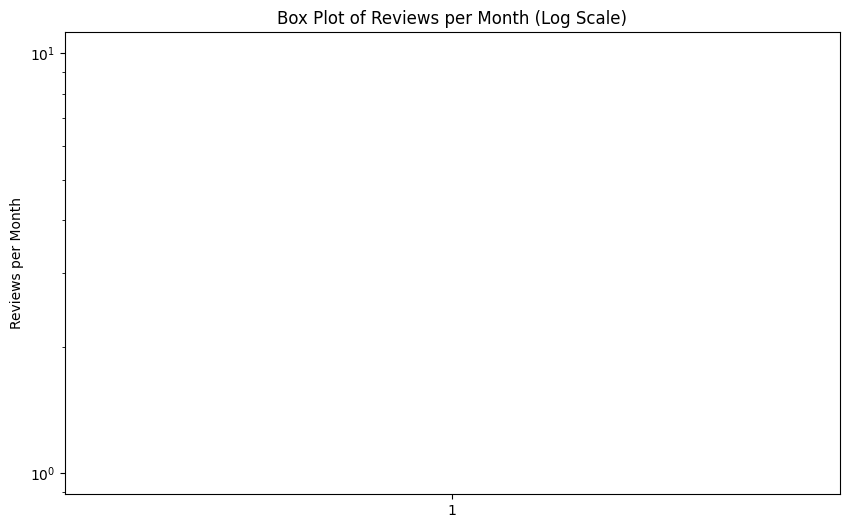

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
reviews = df1['reviews_per_month']

plt.figure(figsize=(10, 6))
plt.boxplot(reviews, vert=True, patch_artist=True)
plt.yscale('log')
plt.ylabel('Reviews per Month')
plt.title('Box Plot of Reviews per Month (Log Scale)')
plt.show()


In [150]:
grouped = df1.groupby('neighbourhood_group')['price'].mean()
grouped

neighbourhood_group
Bronx            628.948086
Brooklyn         626.317062
Manhattan        622.155361
Queens           627.596510
Staten Island    618.537984
The Bronx        909.000000
Name: price, dtype: float64

In [8]:
#!pip install matplotlib
import matplotlib.pyplot as plt

In [153]:
#Top 10 most expensive neighbourhoods
round(df1.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10],2)

neighbourhood
Grand Street              1148.00
21st Street               1111.00
New Dorp                  1046.00
Chelsea, Staten Island    1042.00
Fort Wadsworth            1024.00
Fulton Street              938.00
Manhattan Avenue           892.00
Broadway                   831.00
Midland Beach              820.62
5th Avenue                 793.00
Name: price, dtype: float64

In [156]:
# 10 suburbs with the most airbnb locations 
top_neighbourhoods  = df1.groupby('neighbourhood')['host_id'].count().sort_values(ascending=False)[:10]

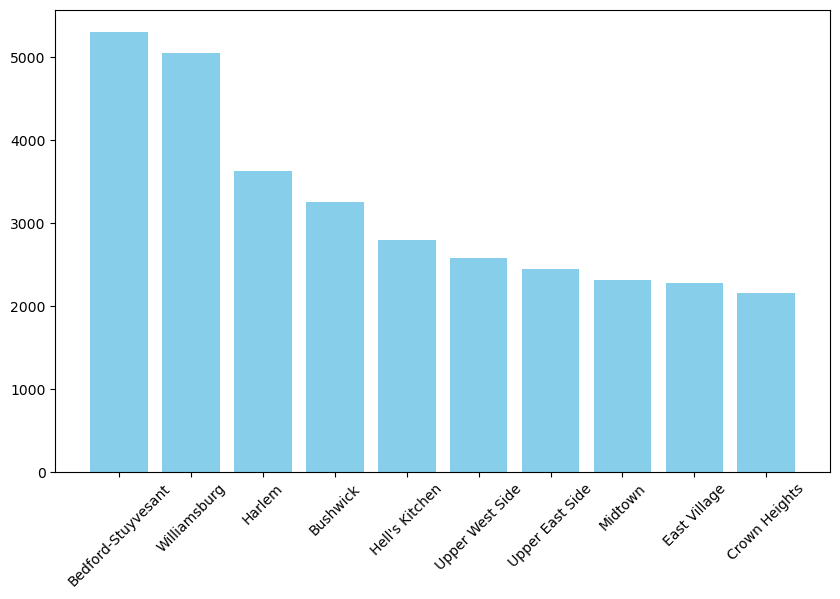

In [157]:
plt.figure(figsize=(10,6))
plt.bar(top_neighbourhoods.index, top_neighbourhoods.values, color='skyblue')
plt.xticks(rotation=45)
plt.show()

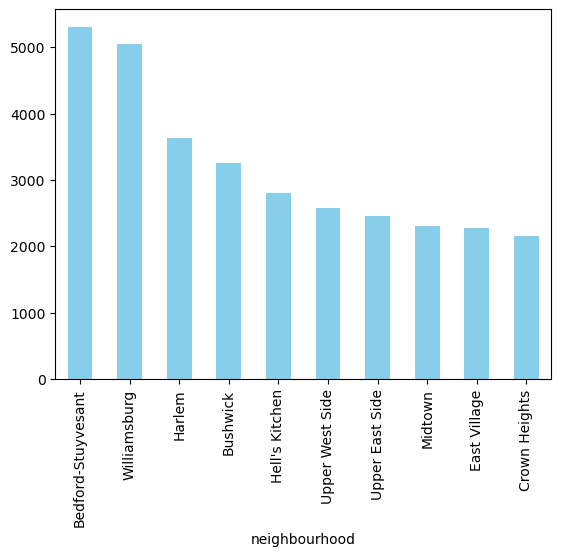

In [158]:
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.show()

In [161]:
df[['host id', 'NAME','number of reviews', 'neighbourhood']].sort_values(by='number of reviews',
                                                                                                ascending=False).head(10)

,host id,NAME,number of reviews,neighbourhood
52488,53558555483,Sonder Battery Park | Studio Apartment,1024.0,Financial District
62244,44069230937,City King,1010.0,SoHo
49799,23813117370,Amazing Micro Unit W/ communal rooftop and kit...,966.0,East Village
53078,41031720514,Enjoy great views of the City!,884.0,Theater District
49653,20032806094,Come catch a Broadway Show & stay in Times Square,849.0,Theater District
49827,78564178478,Hudson River View King Bed at Higher Floor,797.0,Theater District
49605,87332142446,Beautiful Standard Full Room at The Ridge,776.0,Lower East Side
57532,90212124971,King Room City,738.0,Midtown
50780,12571850348,THE PRIVACY DEN ~ 5 MINUTES TO JFK,698.0,Jamaica
54308,19892961158,Entire New Apartment in Park Slope / Gowanus,679.0,Gowanus


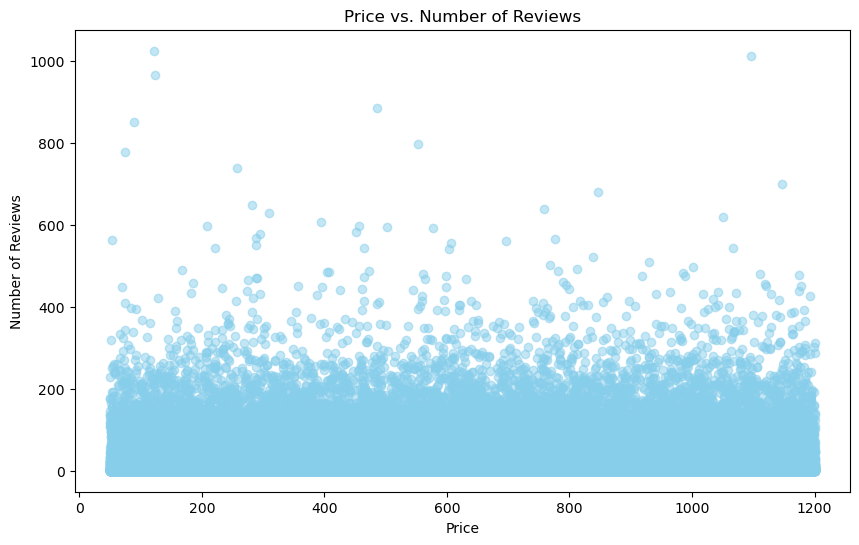

In [163]:
#scatter find relationship between price and number of reviews
plt.figure(figsize=(10,6))
plt.scatter(df1['price'], df1['number_of_reviews'], color='skyblue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')
plt.show()


In [164]:
df1.isna().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
airport_distance                  0
dtype: int64

In [176]:
df1.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'airport_distance', 'z_score_price'],
      dtype='object')

In [ ]:
from django.db import models
class Review(models.Model):
    listing = models.ForeignKey(Listing, on_delete=models.CASCADE, related_name='reviews')
    user = models.ForeignKey(User, on_delete=models.CASCADE)
    rating = models.PositiveSmallIntegerField(validators=[MinValueValidator(0), MaxValueValidator(5)], editable=False)
    comment = models.TextField()
    created_at = models.DateTimeField(auto_now_add=True)

    class Meta:
        # order review based on created date desending
        ordering = ['-created-at']
        unique_together = ['listing', 'user']

    def save(self, *args, **kwargs):
        is_new = self.pk is None
        super().save(*args, **kwargs)
        listing = self.listing
        reviews = listing.reviews.all()
        listing.number_of_reviews = reviews.count()
        listing.last_review = self.created_at.date()
        total_rating = sum(review.rating for review in reviews)
        listing.review_rate_number = total_rating/listing.number_of_reviews if listing.number_of_reviews > 0 else None
        if listing.number_of_reviews>1:
            first_review_date = reviews.order_by('created_at').first().created_at.date()
            last_review_date = listing.last_review
            months_diff = (last_review_date.year - first_review_date.year)*12 + (last_review_date.month- first_review_date.month)
            if months_diff>0:
                listing.reviews_per_month = listing.number_of_reviews/months_diff
        listing.save(update_fields=['number_of_reviews','last_review','review_rate_number','reviews_per_month'])    


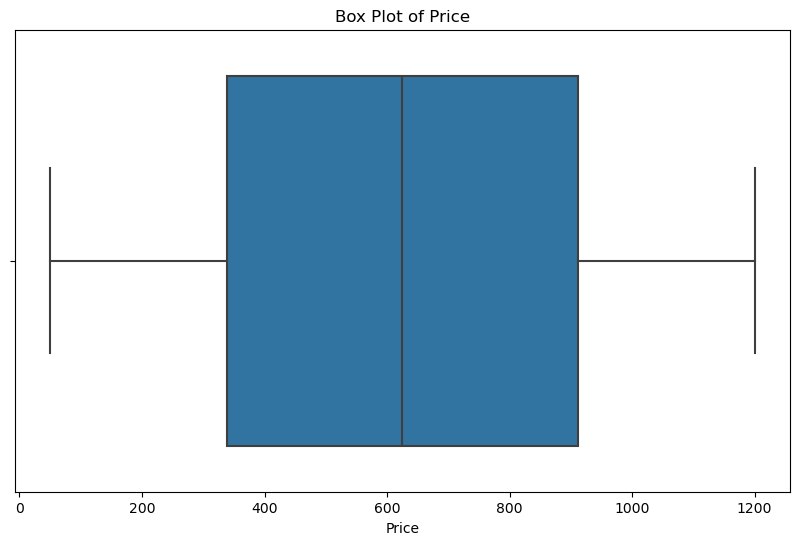

In [165]:
import seaborn as sns
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='price')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()



/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


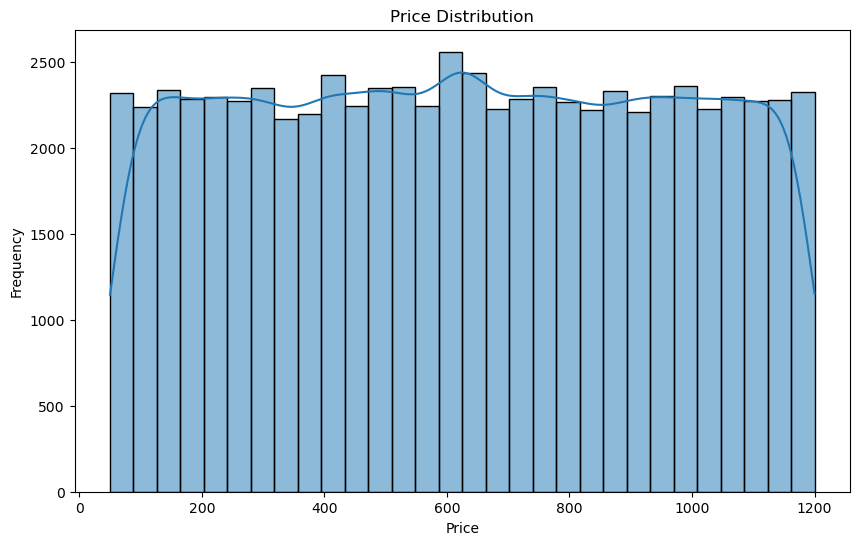

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


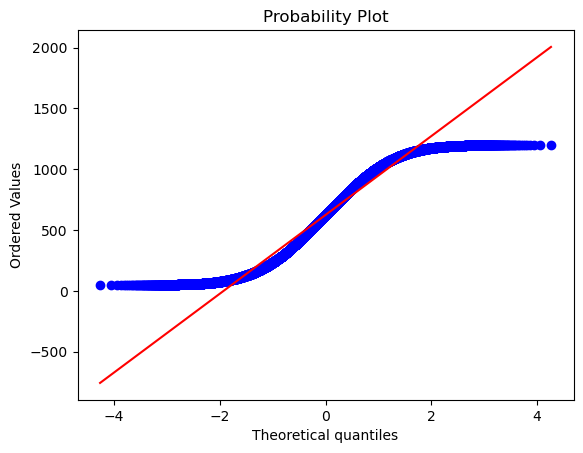

In [178]:
import scipy.stats as stats
stats.probplot(df1['price'], dist="norm", plot=plt)
plt.show()

In [173]:
print(df1['price'].describe())
print(f"Skewness: {df1['price'].skew()}")
print(f"Kurtosis: {df1['price'].kurt()}")


count    68992.000000
mean       624.715561
std        331.171508
min         50.000000
25%        339.000000
50%        624.000000
75%        911.000000
max       1200.000000
Name: price, dtype: float64
Skewness: 0.0018132826071077584
Kurtosis: -1.1886613985684533


In [174]:
from scipy import stats

# Compute Z-scores
df1['z_score_price'] = stats.zscore(df1['price'])
outliers_z = df1[(df1['z_score_price'] > 3) | (df1['z_score_price'] < -3)]
print(f'Number of outliers detected using Z-scores: {len(outliers_z)}')


Number of outliers detected using Z-scores: 0


In [175]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = df1[(df1['price'] < (Q1 - 1.5 * IQR)) | (df1['price'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers detected using IQR: {len(outliers_iqr)}')


Number of outliers detected using IQR: 0


In [179]:
data = df1.groupby(['neighbourhood']).agg({'price':'mean', 'review_rate_number':'mean'}).sort_values(by='price', ascending=False).round(2)

In [180]:
data.head(10)

,price,review_rate_number
neighbourhood,,
Grand Street,1148.00,3.00
21st Street,1111.00,4.00
New Dorp,1046.00,3.50
"Chelsea, Staten Island",1042.00,2.00
Fort Wadsworth,1024.00,2.00
Fulton Street,938.00,2.00
Manhattan Avenue,892.00,4.00
Broadway,831.00,3.00
Midland Beach,820.62,3.31


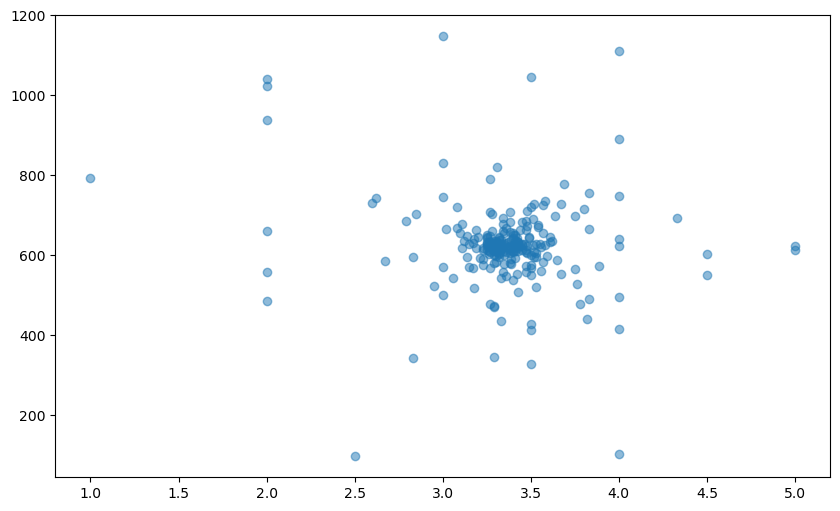

In [181]:
plt.figure(figsize=(10, 6))
plt.scatter(data["review_rate_number"], data["price"], alpha=0.5)
plt.show()

In [ ]:
data = df1['neighbourhood_group'][df1['neighbourhood']=='Arden Heights'].unique()
data

In [27]:
group = df1.loc[df1['neighbourhood']=='Arden Heights', ['neighbourhood_group', 'price']].round(1)[:2]

In [28]:
group

,neighbourhood_group,price
29605,Staten Island,961.0
35820,Staten Island,604.0


In [26]:
host_ids = df1.groupby('host_id')['id'].count()
multiple_properties = host_ids[host_ids>1].index
multiple_properties

Index([  150519910,   176369804,   538762830,   635525656,   651454903,
         653456847,   846909103,   862834181,   885280047,  1074774907,
       ...
       95871502414, 96025410264, 96980723329, 97219387634, 97528248465,
       97606085736, 98245243479, 98280718071, 98342871281, 98402835539],
      dtype='int64', name='host_id', length=542)

In [ ]:
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)
df['distance_to_airport'] = df['distance_to_airport'].round(2)
max_distance = df[df['distance_to_airport']== min(df['distance_to_airport'])]
max_distance


hosts = df[['host_id', 'host_name', 'host_identity_verified', 'calculated_host_listings_count']].drop_duplicates()


In [ ]:
data = hosts.loc[(hosts['host_id']==29531702698) &  (hosts['calculated_host_listings_count']==6.0) ]
# df.drop(index=42960, inplace=True)
hosts.drop(index=42960, inplace=True)
hosts.to_sql('hosts', engine, index=False, if_exists='append')
hosts.to_sql('hosts', engine, index=False, if_exists='append')
listings = df[[
    'id', 'NAME', 'host_id', 'neighbourhood_group', 'neighbourhood', 
    'lat', 'long', 'room_type', 'Construction_year', 'price', 
    'service_fee', 'minimum_nights', 'availability_365', 'instant_bookable', 'cancellation_policy'
]].drop_duplicates()
reviews = df[['id', 'number_of_reviews', 'last_review', 
    'reviews_per_month', 'review_rate_number']].drop_duplicates()

# the first rest_index(drop=True) removes the current index and replace it with a standard integer index, the second index
# creates a new column called 'index' containing these sequential integers

reviews = reviews.reset_index(drop=True).reset_index()
reviews.rename(columns={'index': 'review_id', 'id': 'listing_id'}, inplace=True)
reviews.to_sql('reviews', engine, index=False, if_exists='replace')